In [1]:
!pip install rdkit-pypi pandas seaborn mols2grid requests

In [2]:
from rdkit import Chem #RDKit Chemistry
from rdkit.Chem.Draw import IPythonConsole #RDKit drawing
from rdkit.Chem import Draw #RDKit drawing
# A few settings to improve the quality of structures 
from rdkit.Chem import rdDepictor
IPythonConsole.ipython_useSVG = True
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem import PandasTools #Add the ability to add a molecule to a dataframe
import mols2grid #The mols2grid library provides a convenient way of displaying molecules in a grid
import requests

In [3]:
mols = [x for x in Chem.SDMolSupplier("drugbank-structures.sdf")]

[15:11:02] Explicit valence for atom # 28 N, 4, is greater than permitted
[15:11:02] ERROR: Could not sanitize molecule ending on line 321019
[15:11:02] ERROR: Explicit valence for atom # 28 N, 4, is greater than permitted
[15:11:02] WARNING: not removing hydrogen atom without neighbors
[15:11:02] WARNING: not removing hydrogen atom without neighbors


In [4]:
mols

 ...]

In [5]:
df = PandasTools.LoadSDF("drugbank-structures.sdf")

[15:11:03] Explicit valence for atom # 28 N, 4, is greater than permitted
[15:11:03] ERROR: Could not sanitize molecule ending on line 321019
[15:11:03] ERROR: Explicit valence for atom # 28 N, 4, is greater than permitted
[15:11:03] WARNING: not removing hydrogen atom without neighbors
[15:11:03] WARNING: not removing hydrogen atom without neighbors


In [6]:
list(df)

['DATABASE_ID',
 'DATABASE_NAME',
 'SMILES',
 'INCHI_IDENTIFIER',
 'INCHI_KEY',
 'FORMULA',
 'MOLECULAR_WEIGHT',
 'EXACT_MASS',
 'JCHEM_ACCEPTOR_COUNT',
 'JCHEM_ATOM_COUNT',
 'JCHEM_AVERAGE_NEUTRAL_MICROSPECIES_CHARGE',
 'JCHEM_AVERAGE_POLARIZABILITY',
 'JCHEM_BIOAVAILABILITY',
 'JCHEM_DONOR_COUNT',
 'JCHEM_FORMAL_CHARGE',
 'JCHEM_GHOSE_FILTER',
 'JCHEM_IUPAC',
 'ALOGPS_LOGP',
 'JCHEM_LOGP',
 'ALOGPS_LOGS',
 'JCHEM_MDDR_LIKE_RULE',
 'JCHEM_NEUTRAL_CHARGE',
 'JCHEM_NUMBER_OF_RINGS',
 'JCHEM_PHYSIOLOGICAL_CHARGE',
 'JCHEM_PKA',
 'JCHEM_PKA_STRONGEST_ACIDIC',
 'JCHEM_PKA_STRONGEST_BASIC',
 'JCHEM_POLAR_SURFACE_AREA',
 'JCHEM_REFRACTIVITY',
 'JCHEM_ROTATABLE_BOND_COUNT',
 'JCHEM_RULE_OF_FIVE',
 'ALOGPS_SOLUBILITY',
 'JCHEM_TRADITIONAL_IUPAC',
 'JCHEM_VEBER_RULE',
 'DRUGBANK_ID',
 'SECONDARY_ACCESSION_NUMBERS',
 'DRUG_GROUPS',
 'GENERIC_NAME',
 'SYNONYMS',
 'PRODUCTS',
 'INTERNATIONAL_BRANDS',
 'ID',
 'ROMol',
 'SALTS']

,MOLECULAR_WEIGHT,GENERIC_NAME,INTERNATIONAL_BRANDS,ROMol
0,2180.2853,Bivalirudin,Angiox; Hirulog,
1,1209.3983,Leuprolide,Camcevi; Leuplin; LeuProMaxx; Memryte; Prostap...,
2,1269.4105,Goserelin,NaN,
3,1811.253,Gramicidin D,Sofradex,
4,1069.22,Desmopressin,Adiuretin; DesmoMelt,
...,...,...,...,...
2563,498.42,Melphalan flufenamide,Pepaxto,
2564,363.223,Fosdenopterin,Nulibry,
2565,499.52,Serdexmethylphenidate,NaN,
2566,452.518,Belumosudil,Rezurock,

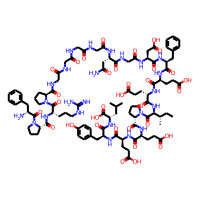
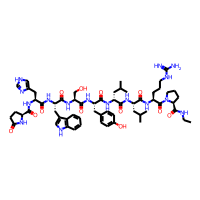
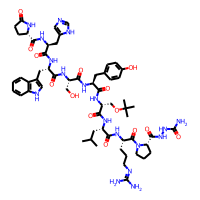
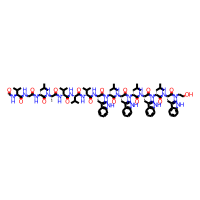
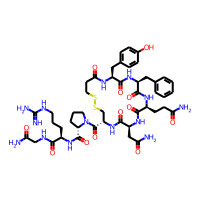
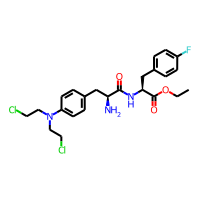
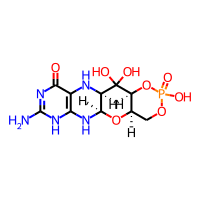
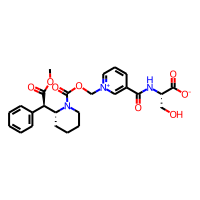
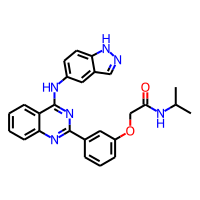
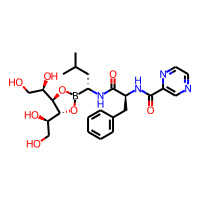

In [7]:
filter = df.filter(items=['MOLECULAR_WEIGHT', 'GENERIC_NAME', 'INTERNATIONAL_BRANDS', 'ROMol',])
filter

In [8]:
from rdkit.Chem.Descriptors import MolWt
from rdkit.Chem.Crippen import MolLogP
df['MW'] = [MolWt(x) for x in df.ROMol]
df['LogP'] = [MolLogP(x) for x in df.ROMol]

In [9]:
two_decimals = lambda x: f"{x:.2f}"
mols2grid.display(df,mol_col="ROMol",subset=["img","MW","LogP", "GENERIC_NAME"],transform={"MW" : two_decimals, "LogP": two_decimals})

MolGridWidget()

In [10]:
import seaborn as sns

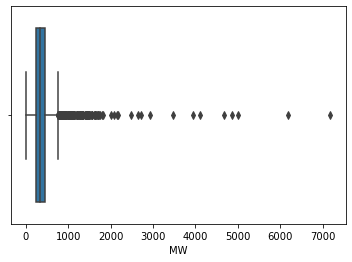

In [11]:
ax = sns.boxplot(x=df.MW)

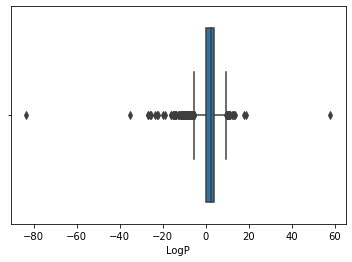

In [12]:
ax = sns.boxplot(x=df.LogP)

In [13]:
import pandas as pd
import numpy as np

In [14]:
%matplotlib inline

,MW,LogP,GENERIC_NAME,INTERNATIONAL_BRANDS,ROMol
0,2180.317,-8.11643,Bivalirudin,Angiox; Hirulog,
1,1209.421,-1.22843,Leuprolide,Camcevi; Leuplin; LeuProMaxx; Memryte; Prostap...,
2,1269.433,-3.10570,Goserelin,NaN,
3,1811.253,4.86760,Gramicidin D,Sofradex,
4,1069.238,-4.13203,Desmopressin,Adiuretin; DesmoMelt,
...,...,...,...,...,...
2563,498.426,3.27010,Melphalan flufenamide,Pepaxto,
2564,363.223,-2.52030,Fosdenopterin,Nulibry,
2565,499.520,-0.27990,Serdexmethylphenidate,NaN,
2566,452.518,4.82010,Belumosudil,Rezurock,

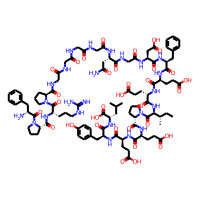
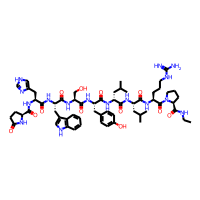
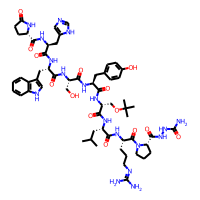
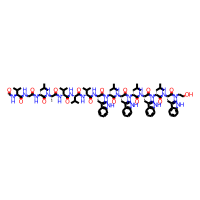
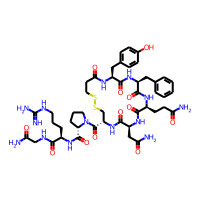
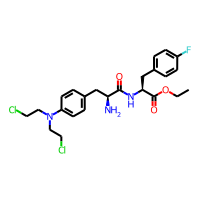
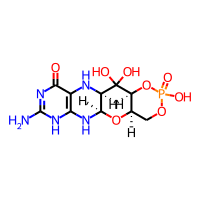
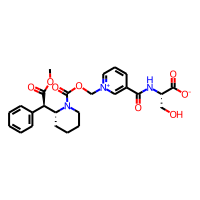
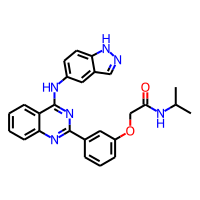
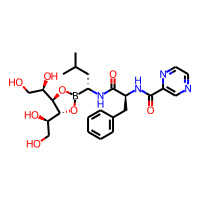

In [15]:
df2 = df.filter(items=['MW', 'LogP', 'GENERIC_NAME', 'INTERNATIONAL_BRANDS', 'ROMol',])
df2

In [16]:
df2.dtypes

MW                      float64
LogP                    float64
GENERIC_NAME             object
INTERNATIONAL_BRANDS     object
ROMol                    object
dtype: object

In [17]:
df2.describe()

,MW,LogP
count,2567.000000,2567.000000
mean,400.132944,1.599505
std,375.347381,4.434557
min,4.003000,-83.666800
25%,240.843500,0.093900
50%,333.343000,2.291000
75%,448.672000,3.837290
max,7177.248000,57.751000


In [18]:
len(df2.MW.unique())

2470

In [19]:
len(df2.LogP.unique())

2443

array([[<AxesSubplot:title={'center':'MW'}>]], dtype=object)

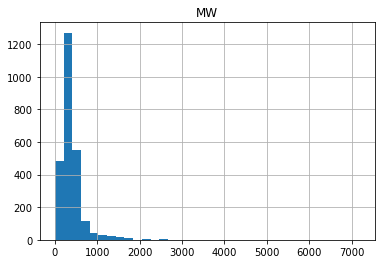

In [20]:
df2.hist(column = 'MW', bins=35)

array([[<AxesSubplot:title={'center':'LogP'}>]], dtype=object)

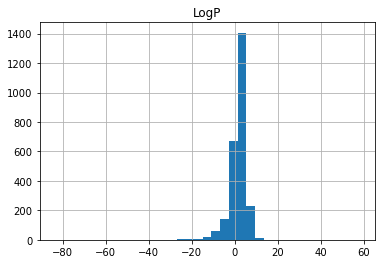

In [21]:
df2.hist(column = 'LogP', bins=35)

In [22]:
df_filter = df2[df2['MW'].between(0, 2000)]
df_filter2 = df_filter[df_filter['LogP'].between(-20, 20)]

In [23]:
df_filter2.describe()

,MW,LogP
count,2546.000000,2546.000000
mean,378.240233,1.742015
std,242.908201,3.535325
min,4.003000,-16.459000
25%,240.307000,0.151400
50%,331.360500,2.322010
75%,444.508250,3.849125
max,1811.253000,18.470620


array([[<AxesSubplot:title={'center':'MW'}>]], dtype=object)

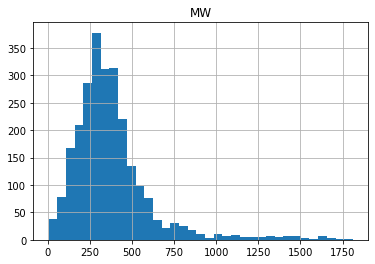

In [24]:
df_filter2.hist(column = 'MW', bins=35)

array([[<AxesSubplot:title={'center':'LogP'}>]], dtype=object)

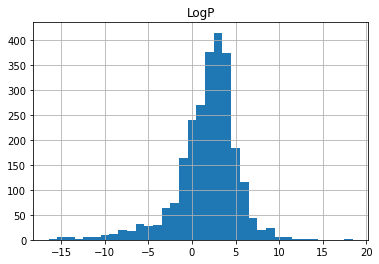

In [25]:
df_filter2.hist(column = 'LogP', bins=35)

In [27]:
df_filter3 = df_filter2[df_filter2['MW'].between(0, 1000)]
df_filter4 = df_filter3[df_filter3['LogP'].between(-10, 10)]

In [28]:
df_filter4.describe()

,MW,LogP
count,2425.000000,2425.000000
mean,343.677653,1.942779
std,164.810212,2.969056
min,4.003000,-9.697000
25%,236.274000,0.364500
50%,323.132000,2.368100
75%,427.564000,3.859500
max,994.208000,9.908300


array([[<AxesSubplot:title={'center':'MW'}>]], dtype=object)

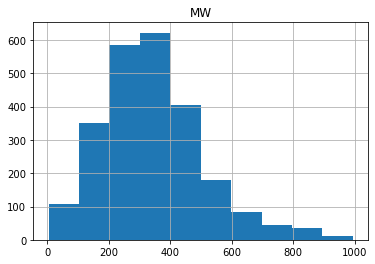

In [29]:
df_filter4.hist(column = 'MW', bins=10)

array([[<AxesSubplot:title={'center':'LogP'}>]], dtype=object)

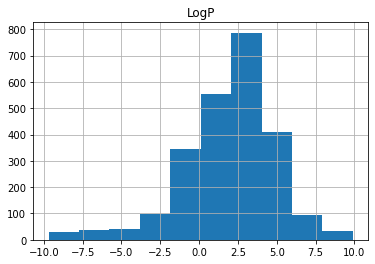

In [34]:
df_filter4.hist(column = 'LogP', bins=10)